<font size=6>Part 1:<br>
EDA & Data Preprocessing on <font color="light blue">Google App Store Rating Dataset.

<font size=5>Question 1.) Import required libraries and read the dataset

In [213]:
# Importing necessary libraries

try:
    import sys, os  
    import numpy as np       
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from scipy import stats
    from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
    from sklearn.model_selection import train_test_split

    print("Modules Imported Sucessfully")
except Exception as err:
    print(err)

Modules Imported Sucessfully


In [214]:
# Defined a function to read the dataset
def read_data(file_path,file_name):
    data=pd.read_csv(file_path+"/"+file_name)
    return data

In [215]:
# Reading the dataset
file_path="D:/Great Learning Data Analytics Course/Python/Week 4/Assessment"
file_name="Google_Playstore_Appdata.csv"
df=read_data(file_path,file_name)

<font size=5>Question 2.) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [216]:
# Displaying the first few samples of the dataset
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1234,Instacart: Grocery Delivery,FOOD_AND_DRINK,4.4,17071,Varies with device,"1,000,000+",Free,0,Everyone,Food & Drink,"August 2, 2018",Varies with device,5.0 and up
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,"500,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
4940,"AC & TV, DVD, Set Top Box - Remote control IR",TOOLS,3.6,3632,3.2M,"1,000,000+",Free,0,Everyone,Tools,"November 13, 2017",11;11.26,4.0.3 and up
8497,DK Browser,COMMUNICATION,4.0,1,2.4M,10+,Free,0,Everyone,Communication,"April 25, 2017",1.0,4.2 and up
10311,FD Fotografia,PHOTOGRAPHY,NaN,2,4.2M,100+,Free,0,Everyone,Photography,"January 17, 2018",0.0.9,4.1 and up


In [217]:
# Checking the shape of the dataset.
df.shape
# The data has 10841 rows and 13 columns

(10841, 13)

In [218]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<font size=5>Question 3.) Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.

In [219]:
# Checking the summary statistics of the variables with data type as float and int.
df.describe(include=[float,int])

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [220]:
# Checking the summary statistics of the variables with data type as object.
df.describe(include=object).T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


<font size=5>Question 4.) Check if there are any duplicate records in the dataset? if any drop them.

In [221]:
# Checking if there are any duplicate records in the dataset.
df[(df.duplicated()==True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [222]:
# There are 483 rows which have duplicate records, so dropping all the duplicate records.
df.drop_duplicates(inplace=True)

In [223]:
# Checking if all the duplicate values are removed from the dataset.
df.duplicated().unique()

array([False])

<font size=5>Question 5.) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [224]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [225]:
df[(df.Category=="1.9")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [226]:
#Category named as '1.9' seems as an invalid category, so dropping the same because it can't be used to infer anything.
df.drop(df[df['Category'] == '1.9'].index,inplace=True)

In [227]:
#Checking if the invalid category has been removed or not.
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<font size=5>Question 6.) Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [228]:
# Checking if there's any missing values present in the column rating.
df["Rating"].isnull().any()

True

In [229]:
# As there are null values present in the Rating column, so dropping them..
df.dropna(subset=["Rating"],inplace=True)

In [230]:
# Checking again if the null values have been dropped.
df["Rating"].isnull().any()

False

In [231]:
# Creating a new column as 'Rating_category' by converting ratings to high and low categories
df["Rating_Category"]=np.where(df["Rating"]>3.5,"High","Low")

In [232]:
# Checking all the unique values of the newly created column.
df["Rating_Category"].unique()

array(['High', 'Low'], dtype=object)

<font size=5>Question 7.) Check the distribution of the newly created column 'Rating_category' and comment on the distribution

In [233]:
# Using histogram to check the distribution of the newly created column 'Rating Category'
round(df["Rating_Category"].value_counts()/len(df)*100,2)

Rating_Category
High    90.1
Low      9.9
Name: count, dtype: float64

<font size=4>By looking at distribution of 'Rating_category' column, I can infer that the majority of apps in the Play Store are rated as 'High', constituting approximately 90.1% of the total. In contrast, the 'Low' rated apps make up a smaller portion, around 9.9%.

<font size=5>Question 8.) Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)


In [234]:
# Checking the data type of "Reviews" column
df['Reviews'].dtype

dtype('O')

In [235]:
# Coverting the "Reviews" column to numeric data.
df["Reviews"]=df["Reviews"].astype(float)

In [236]:
# Checking the data type to make sure it has changed from object to numeric data type.
df['Reviews'].dtype

dtype('float64')

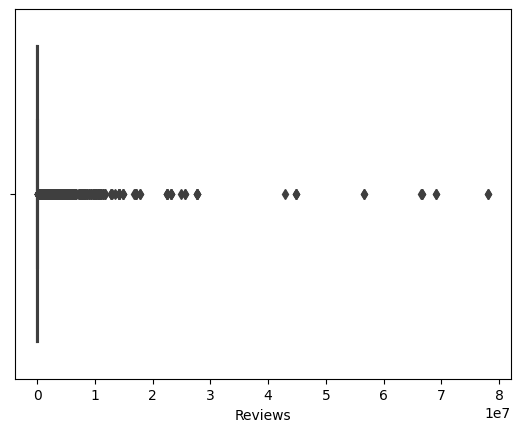

In [237]:
# Checking the presence of the outliers using boxplot from seaborn library.
sns.boxplot(data=df,x="Reviews")
plt.show()

<font size=4>As a lot of outliers can be seen in the column using the boxplot, so handling the outliers using log transformation.

In [238]:
df["Reviews"]=np.log(df["Reviews"])

In [239]:
# Displaying the "Reviews" column after log transformation
df["Reviews"].head()

0     5.068904
1     6.874198
2    11.379508
3    12.281384
4     6.874198
Name: Reviews, dtype: float64

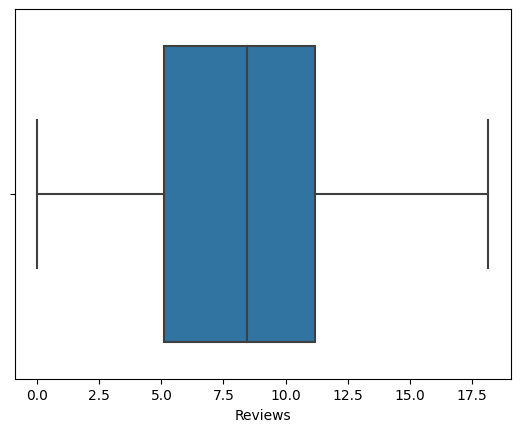

In [240]:
# Checking if the outliers are treated using boxplot.
sns.boxplot(data=df,x="Reviews")
plt.show()

<font size=4>After the log transformation, the outliers are completely treated, and now there is no outliers in the "Reviews" column.

<font size=5>Question 9.) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')

In [241]:
# Displaying all the unique values of the column "Size"
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [242]:
# Looping through the column and doing the replacements.
for index, col in enumerate(df['Size']):
    if 'M' in col:
        df.iloc[index, df.columns.get_loc('Size')] = round(float(col.split('M')[0])) * 1000000
    elif 'k' in col:
        df.iloc[index, df.columns.get_loc('Size')] = round(float(col.split('k')[0])) * 1000
    elif col == 'Varies with device':
        df.iloc[index, df.columns.get_loc('Size')] = None

# Dropping the null values which was assigned to "Varies with device"
df.dropna(subset=['Size'],inplace=True)

In [243]:
# Checking if all the replacements are done
df["Size"].unique()

array([19000000, 14000000, 9000000, 25000000, 3000000, 6000000, 29000000,
       33000000, 28000000, 12000000, 20000000, 21000000, 37000000,
       17000000, 39000000, 31000000, 4000000, 23000000, 5000000, 11000000,
       24000000, 15000000, 10000000, 1000000, 26000000, 8000000, 56000000,
       57000000, 35000000, 54000000, 201000, 2000000, 27000000, 7000000,
       16000000, 38000000, 32000000, 18000000, 52000000, 30000000,
       22000000, 13000000, 73000000, 42000000, 55000000, 23000, 51000000,
       41000000, 48000000, 46000000, 40000000, 61000000, 66000000, 79000,
       118000, 44000000, 695000, 53000000, 45000000, 63000000, 49000000,
       77000000, 70000000, 36000000, 84000000, 97000000, 47000000, 556000,
       526000, 76000000, 59000000, 78000000, 72000000, 43000000, 334000,
       93000000, 65000000, 79000000, 100000000, 58000000, 50000000,
       68000000, 64000000, 34000000, 67000000, 60000000, 94000000, 232000,
       99000000, 624000, 95000000, 8000, 41000, 292000, 1

In [244]:
# Changed the data type of size to int.
df["Size"]=df["Size"].astype(int)

<font size=5>Question 10.) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [245]:
# Displaying the unique values of the column 'Installs'
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [246]:
# Replacing all the special character from the column Installs and converting it to int.
df["Installs"]=df["Installs"].str.replace(",","").str.replace("+","")

In [247]:
df["Installs"]=df["Installs"].astype(int)

In [248]:
# Checking if the changes are made to the column.
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

<font size=5>Question 11.) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [249]:
# Displaying the unique values of the column 'Price'
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [250]:
# Removing '$' from the Price column and converting the data type to float.
df["Price"]=df["Price"].str.replace("$","")

In [251]:
df["Price"]=df["Price"].astype(float)

In [252]:
# Checking if the changes are made to the column.
df["Price"].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

<font size=5>Question 12.) Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [253]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_Category'],
      dtype='object')

In [254]:
# Dropping all the columns that are redundant for the analysis.
df.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [255]:
# Checking column names after dropping the redundant columns.
df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_Category'],
      dtype='object')

<font size=5>Question 13.) Encode the categorical columns.

In [257]:
# Displaying all the unique values in columns with data type object.
for col in df.select_dtypes(["object"]):
    print(f"{col}: ",df[col].unique(),"\n")

Category:  ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'] 

Type:  ['Free' 'Paid'] 

Content Rating:  ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'] 

Rating_Category:  ['High' 'Low'] 



In [258]:
#Defined a function to encode the variables depending upon the method to be used.

def encode_var(data, method="one hot encoding", target="Rating_Category"):
    columns = data.select_dtypes(["object"]).columns
    
    if method == "one hot encoding":
        for col in columns:
            if col != target:
                encoded_df = pd.get_dummies(data[col], prefix=col,dtype=int)
                data = pd.concat([data, encoded_df], axis=1)
                data.drop(col, axis=1, inplace=True)
        return data
    
    else:
        for col in columns:
            if col == target:
                le = LabelEncoder()
                data[col] = le.fit_transform(data[col])
        return data

In [259]:
# Calling the function to encode the variables with One Hot Encoding
df=encode_var(df,method="one hot encoding",target="Rating_Category")

In [262]:
# Calling the function to encode the variable with Label Encoding i.e Rating_Category in this case
df=encode_var(df,method="label encoding",target="Rating_Category")

In [263]:
# Displaying all the columns from the df (All the columns are now in numerical format).
df.head()

,Reviews,Size,Installs,Price,Rating_Category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000,10000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6.874198,14000000,500000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,11.379508,9000000,5000000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12.281384,25000000,50000000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6.874198,3000000,100000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<font size=5>Question 14.) Segregate the target and independent features (Hint: Use Rating_category as the target)

In [ ]:
# Defined a function to seperate the target variable from the dataframe.
def seperate_taget(data,target_var):
    targ_var=data.pop(target_var)
    return data,targ_var

In [ ]:
# Calling the function to seperate the target var.
df,targ_var=seperate_taget(df,"Rating_Category")

<font size=5>Question 15.) Split the dataset into train and test.

In [ ]:
# Defined a function to split the dataset into train and test
def split_data(data,target_df):
    x_train, x_test, y_train, y_test = train_test_split(data,target_df,test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

In [ ]:
# Calling the function to split the data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test=split_data(df,targ_var)

<font size=5>Question 16.) Standardize the data, so that the values are within a particular range.


In [ ]:
# Defined a function to standardize the data
def stand_data(data_train, data_test):
    scaler = StandardScaler()
    scaler.fit(data_train)
    data_train_scaled = scaler.transform(data_train)
    data_test_scaled = scaler.transform(data_test)

    data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns, index=data_train.index)
    data_test_scaled = pd.DataFrame(data_test_scaled, columns=data_test.columns, index=data_test.index)

    return data_train_scaled, data_test_scaled

In [ ]:
# Calling the function to standardize the x_train and x_test data.
x_train,x_test=stand_data(x_train,x_test)

In [ ]:
# Displaying all the standardize data.
x_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
9375,1.405310,0.761777,0.987099,-0.057566,-0.279031,-0.063592,-0.464576
3025,1.405310,0.765571,0.172166,-0.146613,-0.279031,-0.063592,-0.464576
7549,0.789831,0.173313,-0.479780,-0.166648,-0.279031,-0.063592,-0.464576
6782,-1.302796,0.616843,-0.452616,-0.057566,-0.279031,-0.063592,-0.464576
1709,-0.318030,2.109208,2.100841,2.057298,-0.279031,-0.063592,-0.464576
...,...,...,...,...,...,...,...
7754,1.405310,-1.291364,-0.452616,-0.168873,-0.279031,-0.063592,-0.464576
7795,-0.687317,0.039199,-0.316793,-0.167762,-0.279031,-0.063592,2.515031
7988,-0.687317,0.552543,-0.153807,-0.157744,-0.279031,-0.063592,2.515031
1446,-0.071839,1.421602,0.416646,0.053743,-0.279031,-0.063592,-0.464576


<font size=6>Part 2:<br>
EDA & Data Preprocessing on <font color="red">
Data Visualization on Honey Production dataset using seaborn
and matplotlib libraries.


<font size=5>Question 1.) Import required libraries and read the dataset.

<font size=4>Libraries imported in Part I, will also be used in II part.

In [ ]:
# Reading the honey production dataset
file_path_2="D:/Great Learning Data Analytics Course/Python/Week 4/Assessment"
file_name_2="Honey_Production.csv"
honey_df=read_data(file_path_2,file_name_2)

<font size=5>Question 2.) Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [ ]:
# Displaying the samples from the honey df
honey_df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
135,GA,55000.0,57,3135000.0,188000.0,0.70,2195000.0,2001
257,WA,58000.0,56,3248000.0,942000.0,1.46,4742000.0,2003
280,MO,16000.0,41,656000.0,151000.0,1.36,892000.0,2004
26,NY,65000.0,80,5200000.0,2444000.0,0.70,3640000.0,1998
158,OH,18000.0,81,1458000.0,569000.0,1.01,1473000.0,2001


In [ ]:
# checking sahpe of the data
honey_df.shape

(626, 8)

In [ ]:
# Checking info of the data
honey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


<font size=5>Question 3.) Display the percentage distribution of the data in each year using the pie chart.

In [ ]:
honey_df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [ ]:
# Creating a varaible for the distribution of the data in each year using value counts.
year_dist=honey_df["year"].value_counts()
year_dist

year
2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: count, dtype: int64

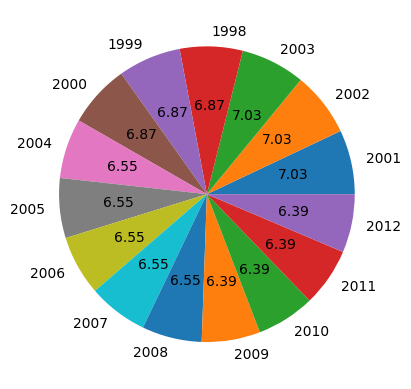

In [ ]:
# Using matplotlib library to display the perecentage distribution of the data in each year with the pie chart.
plt.pie(year_dist,labels=year_dist.index,autopct='%.2f')
plt.show()

<font size=5>Question 4.) Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings

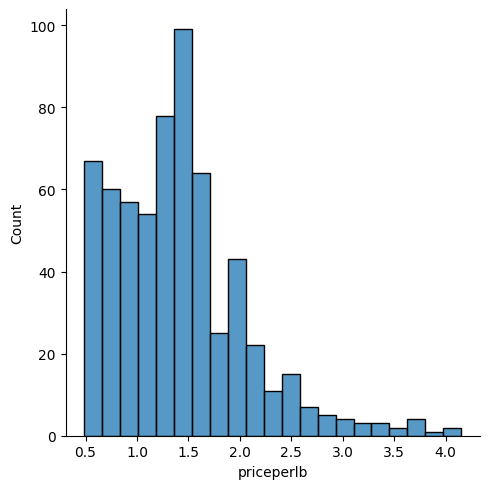

In [ ]:
# Using seaborn lib to plot the dist of variable "price per lb" using displot
sns.displot(data=honey_df,x="priceperlb")
plt.show()

<font size=5>Interpretations:<br>
It can be seen that the distribution of the variable "price per lb" is positively skewed or we can say it is rightly skewed as the it has thicker tail moving towards the right side and also the mean happens to be greater than the median.<br>
This Rightly skewed distribution also indicates that there are potential outliers present on the right side of the distribution.


<font size=5>Question 5.) Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.

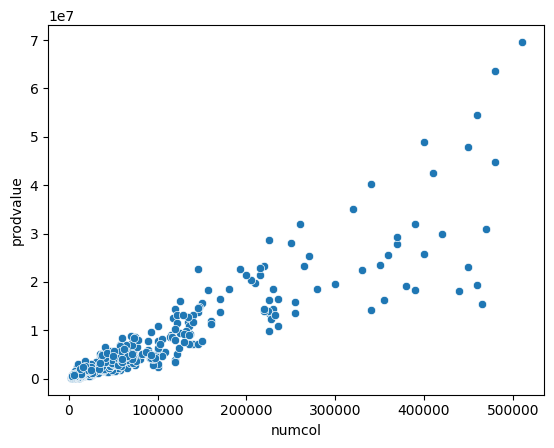

In [ ]:
# Using seaborn lib to plot the relationship between "numcol" and "prodvalue" using scatterplot
sns.scatterplot(data=honey_df,x="numcol",y="prodvalue")
plt.show()

<font size=5>Interpretation:<br>
This scatterplot reveals a strong positive relation between the variables "numcol" and "prodvalue" and an upward trend, which infers that as the value of numcol increases, the value of prodvalue will also increase and vice versa.


<font size=5>Question 6.) Plot and understand the relationship between categorical variable 'year' and a numerical variable
'prodvalue' through boxplot, and write your findings.

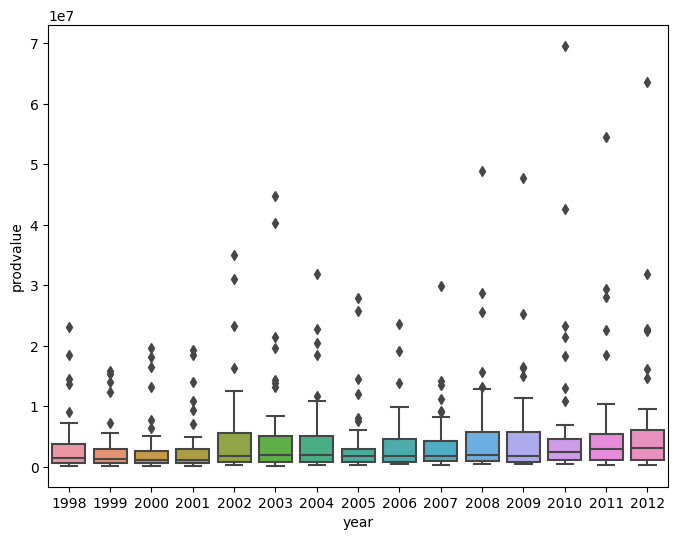

In [ ]:
# Using seaborn lib to plot the relationship between "year" and "prodvalue" using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=honey_df,x="year",y="prodvalue")
plt.show()

<font size=5>Interpretations:<br>
Across various years, the recorded minimum production remains uniform, exhibiting only slight differences in selected years. This suggests a consistent baseline level of production in each year.<br>
50% of the production is also the same (almost) in each year.<br>
The years 2002 and 2008 reported the maximum production values. 

<font size=5>Question 7.) Visualize and understand the relationship between the multiple pairs of variables throughout different years
using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


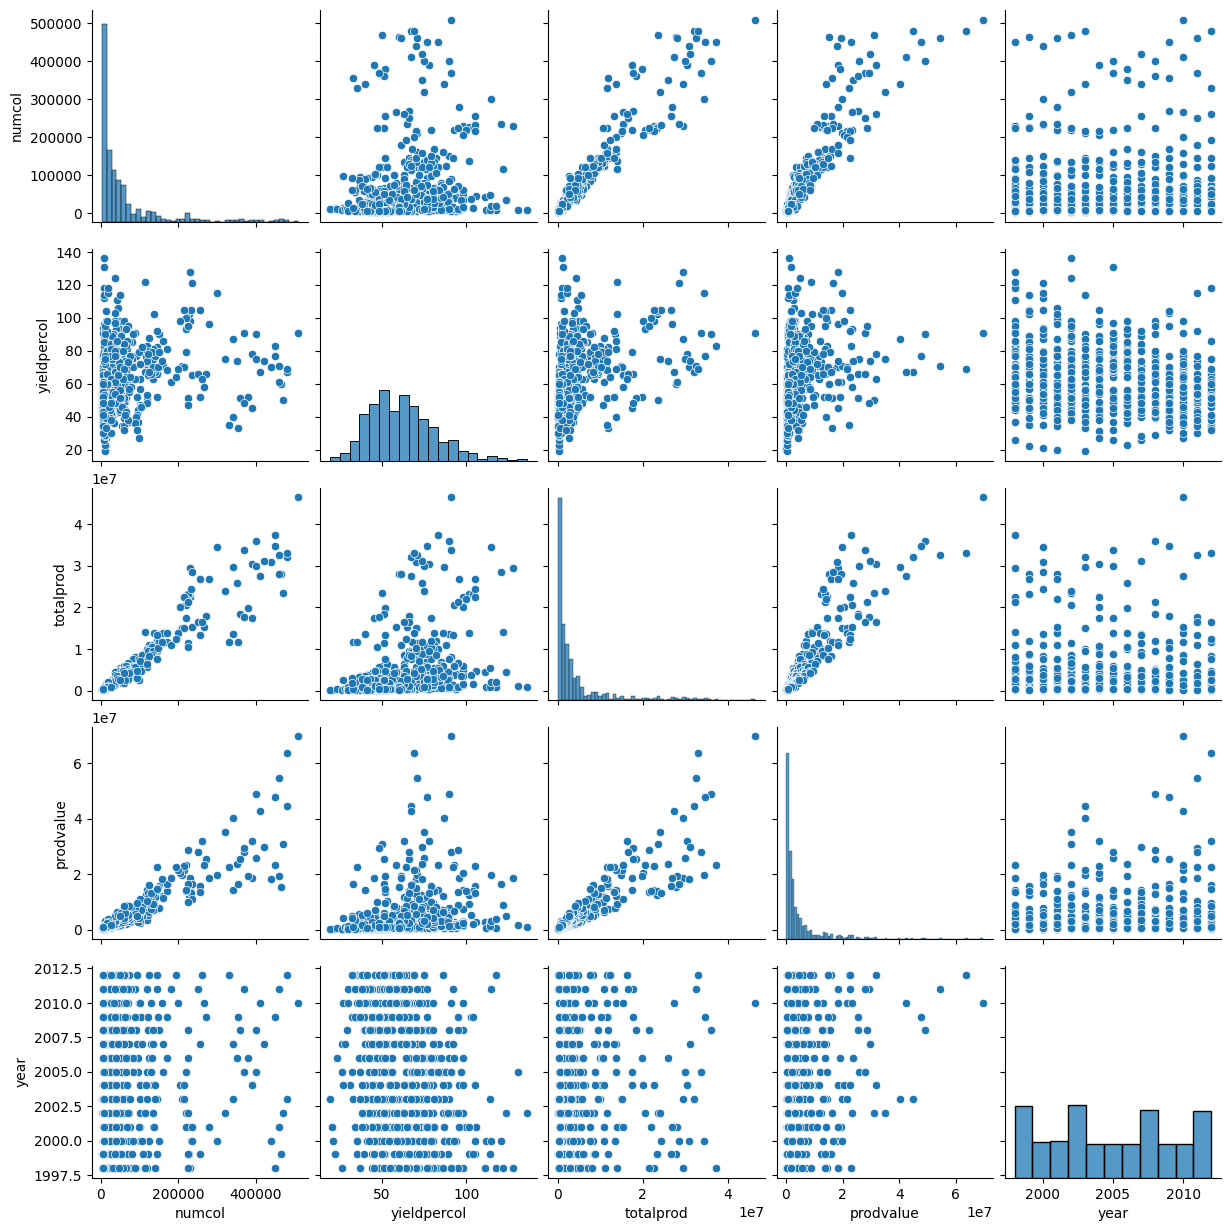

In [ ]:
#Using seaborn to plot pairplot to find the relationship between the variables.
sns.pairplot(honey_df[['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']])
plt.show()

<font size=5>Interpretations:<br>
Majority of the variables are having no linear relationship, indicating that the change in the value of one variable will not affect the value of the other variable.<br>
while some variables are having multicollinearity between them, that might create redundancy in the model.<br>
Most of the variables tend to have a positive skewed distribution or rightly skewed distribution indicating higher value of median and compared to the mean.<br>


<font size=5>Question 8.) Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
'total prod', 'stocks', 'price per lb', 'prodvalue')

In [ ]:
honey_df[['numcol', 'yieldpercol','totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


<font size=5>Interpretations:<br>
1.) Variable "numcol" is highly correlated with the variables "totalprod", "stocks", "prodvalue" with correlation coefficient values of 0.95, 0.83 and 0.91 respectively, indicating that higher value of colonies will result in higher total production, stocks and production value and vice versa.<br>
2.) Variable "Totalprod" has strong positive relationship with the variables "stocks", "prodvalue" with correlation coefficient values of 0.88 and 0.91 respectively.<br>
3.) Variable "stocks" shows a good positive relation with "provalue" with correlation coefficient value of 0.73.<br>
4.) Variable "Yield per col" indicates very weak positive realtionship between all the other variables present.<br>
5.) The variable "priceperlb" is showing negative realtion with all the variables present. Though the relation happens as a weak relation, but still indicates that increase in the value of price per lb will decrease the values of all the other variables.<br>
